In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from tests.slice_acquisition.test_slice_acq import *
from sigpy import shepp_logan
import torch

def show_slices(volume, title="Slices"):
    """ Function to display row of image slices """
    if isinstance(volume, torch.Tensor):
        volume = volume.detach().cpu().numpy()
    h, w, l = volume.shape
    slice_0 = volume[h // 2, :, :]
    slice_1 = volume[:, w // 2, :]
    slice_2 = volume[:, :, l // 2]
    slices = [slice_0, slice_1, slice_2]
    
    fig, axes = plt.subplots(1, len(slices))
    fig.suptitle(title)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
    return fig

Testing angles: [[0, 0, 0], [1.5707963267948966, 0, 0], [0, 1.5707963267948966, 0], [0, 0, 1.5707963267948966], [0.7853981633974483, 0.7853981633974483, 0], [0, 0.7853981633974483, 0.7853981633974483], [0.7853981633974483, 0, 0.7853981633974483], [1.0471975511965976, 1.0471975511965976, 0], [0, 1.0471975511965976, 1.0471975511965976], [1.0471975511965976, 0, 1.0471975511965976], [2.0943951023931953, 2.0943951023931953, 0], [0, 2.0943951023931953, 2.0943951023931953], [2.0943951023931953, 0, 2.0943951023931953], [0.6283185307179586, 0.6283185307179586, 0], [0, 0.6283185307179586, 0.6283185307179586], [0.6283185307179586, 0, 0.6283185307179586]]
Mismatches: 2284010/13824000(16.522064208984375%),                     max error: 0.0021857023239135742, mean error: 1.9304683519294485e-05
----------------------------------------------------------


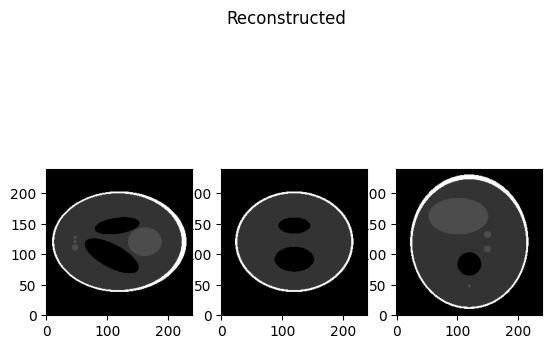

In [18]:
slice_acq_tester = TestSliceAcq(phantom="sigpy", verbose=True)
pick_best_angles = False
if pick_best_angles:
    sorted_indices = slice_acq_tester.test_cg_recon(pick_best_angles=False)
    for idx in sorted_indices:
        fig = show_slices(slice_acq_tester.reconstructed[idx].squeeze(), title=f"Reconstructed {idx}")
else:
    reconstructed = slice_acq_tester.test_cg_recon(pick_best_angles=False)
    fig = show_slices(reconstructed.squeeze(), title=f"Reconstructed")

## Test reconstructing ADNI volume

In [19]:
volume = nib.load("MedicalImaging/adcp_alldata_location2/ADCP_harmonization/ADCP_2085/recontruct_ADCP_2085_volume_h.nii.gz").get_fdata()
angles = [
    [1.57079633, 0., 0.],
    [0., 1.57079633, 0.],
    [0., 0., 1.57079633]
    ]
volume_ = slice_acq_tester.test_cg_recon(volume=volume, angles=angles)
show_slices(volume_, title="Reconstructed")

RuntimeError: The size of tensor a (209) must match the size of tensor b (240) at non-singleton dimension 4

## Compare the phantom used in the repo the and one I found

Visualizing phantom.nii.gz
Visualizing sigpy_phantom.nii.gz


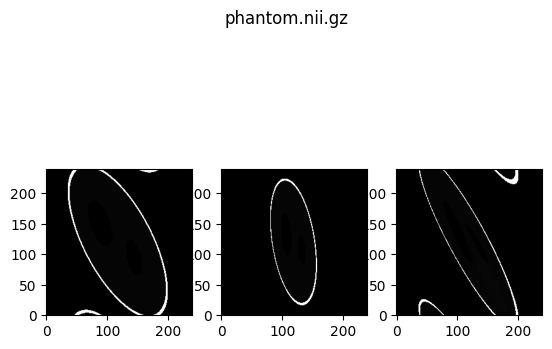

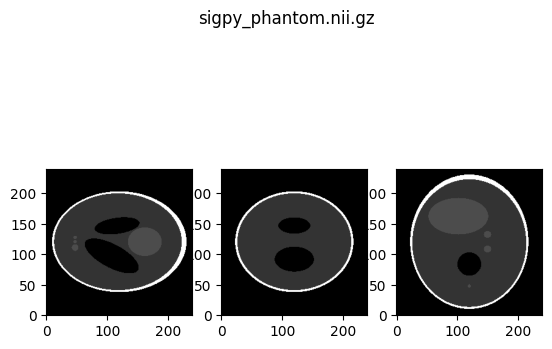

In [20]:
import os

volumes_to_vis = ["phantom.nii.gz", "sigpy_phantom.nii.gz"]
for vol in volumes_to_vis:
    if os.path.exists(vol):
        print(f"Visualizing {vol}")
        volume = nib.load(vol).get_fdata()
        fig = show_slices(volume, title=os.path.basename(vol))
        # fig.show()